In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import cv2
from google.colab.patches import cv2_imshow

Mounted at /content/drive


#**DataSet**

In [45]:
#Dataset

DrivePath = '/content/drive/My Drive/CIS/Trainee/part4/creditcard.csv'

cc=pd.read_csv(DrivePath)

cc=cc.drop(columns='Time')

cc=cc.drop_duplicates()

print(cc.describe())

#criando o modelo de undersampling


x= cc.iloc[:,:-1].to_numpy()
y= cc.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=0)


from imblearn.under_sampling import RandomUnderSampler

under=RandomUnderSampler(sampling_strategy=1) 

cc_underx,cc_undery=under.fit_resample(x,y)


#juntando os dados e arrumando o Dataset novo.

cc_underx=pd.DataFrame(cc_underx)

cc_undery=pd.DataFrame(cc_undery)


cc_under=pd.concat([cc_underx, cc_undery],axis=1)

cc_under.columns=cc.columns

cc_under

                  V1             V2  ...         Amount          Class
count  275663.000000  275663.000000  ...  275663.000000  275663.000000
mean       -0.037460      -0.002430  ...      90.578380       0.001716
std         1.952522       1.667260  ...     253.213954       0.041388
min       -56.407510     -72.715728  ...       0.000000       0.000000
25%        -0.941105      -0.614040  ...       6.300000       0.000000
50%        -0.059659       0.070249  ...      23.740000       0.000000
75%         1.294471       0.819067  ...      79.910000       0.000000
max         2.454930      22.057729  ...   25691.160000       1.000000

[8 rows x 30 columns]


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.969883,-0.327661,0.730920,1.168112,-0.615407,0.103584,-0.330366,0.034061,0.465545,-0.068270,-1.142920,0.084392,0.667422,-0.118995,1.449044,0.923751,-1.028222,0.593029,-0.432622,0.210493,0.135201,0.134753,-0.234420,-0.439667,0.411560,-0.325187,0.037163,0.056809,144.00,0
1,0.100148,0.676166,1.043494,0.962490,0.365101,-0.261914,1.470772,-0.639380,0.544084,-0.041158,-0.923984,0.888923,0.552844,-0.902309,-2.071479,-1.451138,0.124451,-1.075664,0.370478,-0.050885,-0.210678,0.155222,0.108503,0.402515,-1.154014,-1.043095,-0.107651,-0.176566,55.00,0
2,2.190885,0.009739,-2.626353,-0.364001,1.085350,-0.747482,0.633756,-0.347802,0.147162,0.215533,-0.270343,0.112190,-0.670100,1.073173,-0.150765,-0.017738,-0.957272,0.479136,0.914882,-0.242120,0.099859,0.381837,-0.212180,-1.346420,0.567808,0.308449,-0.095751,-0.104886,0.77,0
3,-0.139753,0.386013,0.770143,-0.528221,0.240410,0.739744,0.257124,0.220514,0.175209,-0.406823,0.330479,0.500232,0.058922,0.069350,0.386418,0.130741,-0.618263,0.579949,1.515842,0.023931,-0.168850,-0.460984,0.137116,0.004717,-0.512929,-0.181443,-0.029127,0.020243,50.75,0
4,0.967724,-0.426578,-0.220598,0.022842,-0.346857,-0.765443,0.370207,-0.146527,-0.206631,-0.018976,1.126065,0.444063,-0.750474,0.792748,0.280284,0.466909,-0.522961,-0.279284,0.646674,0.227060,-0.324785,-1.429206,0.022951,0.010812,0.028492,0.610272,-0.140925,0.016776,169.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
942,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
943,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
944,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [46]:
#embaralhar o dataset

print(np.array(cc_under['Class']))

cc_under=cc_under.sample(frac=1)

print(np.array(cc_under['Class']))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

#**Perceptron**



---

O Perceptron é a forma mais simples da configuração de uma rede neural artificial, uma vez que é constituída de uma única camada neural e de um único neurônio. A figura abaixo ilustra a rede Perceptron de única camada, onde podemos ter N entradas, mas apenas uma única saída com um valor de 0 e 1

---

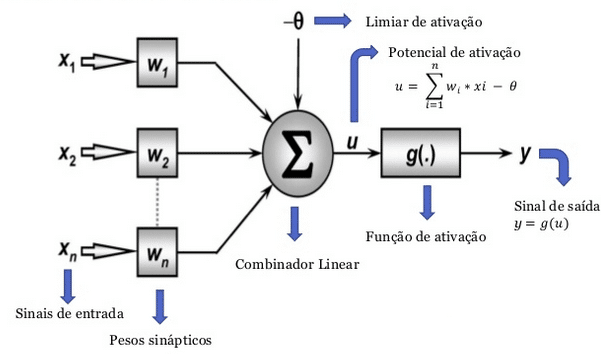

---
O funcionamento da rede Perceptron consiste, nas entradas (Xi) sendo que cada uma das entradas terá um peso ponderado (Wi) que representa a importância de cada entrada em relação ao valor de saída desejado (y). O resultado da somatória das entradas ponderadas será somado ao Bias(b) e então repassado como argumento da função de ativação g(.), no nosso modelo uma função sigmoid, a qual terá como resultado a saída desejada.

---

Os pesos, assim como o Bias do Perceptron, serão corrigidos através do processo de treinamento supervisionado para cada amostra dos sinais de entrada.  Se a saída produzida coincidir com a saída desejada, os pesos  e os Bias serão incrementados proporcionalmente aos valores de seus sinais de entrada. Do contrário, caso a saída seja diferente, seus valores serão decrementados. Este processo irá se repetir sequencialmente para todas as amostras de treinamento, até que a saída final seja similar à desejada

---

In [47]:
#criação da classe perceptron

from sys import ps1
def acuracia(y,y_previsto):
  return np.sum(y==y_previsto)/len(y)


class perceptron:


  def __init__(self,lr,interacoes):       #parametros inicias 
    self.lr = lr
    self.ni = interacoes
    self.weights=None
    self.bias=0

  def act_func(self,x):     #função de ativação sigmoid
    return 1/(1 + np.exp(-x))


  def fit(self,x,y,verbose=False):    #função de treinametno do percptron
    sample,features=x.shape

    self.weights=np.zeros(features)     #iniciando os pesos

    

    y_meio=np.zeros(len(y))     
    for k in range(self.ni):

      
      for indice,x_i in enumerate(x):
        if verbose==True:
          #print(x_i)
          
          print(y_meio)
          
        y_meio= self.act_func(np.dot(x_i, self.weights) + self.bias)    #ativação do neuronio
        delta= self.lr * (y[indice]-y_meio)                           #calculo para o Delta 
        self.weights += delta*x_i                                     #ajuste dos pesos
        self.bias += delta                                            #ajuste do Bias
        

     
        

  def predict(self,x):        #função de previsão do percptron
    
    return np.around(self.act_func(np.dot(x, self.weights) + self.bias),0)





In [48]:
#seaprando o Dataset em datasets de treino e teste
    
x= cc_under.iloc[:,:-1].to_numpy()
y= cc_under.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state=0)



In [49]:
#criação,treinamento do perceptron, além de previsão de acordo com o Dataset de treino

perc=perceptron(lr=0.01,interacoes=1000)


perc.fit(x_train,y_train,verbose=False)

predict=perc.predict(x_test)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in exp


In [50]:
# Usamos A Matriz de confusão para comparar o resultado previsto com o resultado esperado. 

# cm = [          Não é fralde                                             não é fraude           ]
#      [    classificada corretamente                             classificado incorretamente     ]
#      [                                                                                          ]
#      [            é fraude                                                 é fraude             ]
#      [    classificado incorretamente                             classificado corretamente     ]         


print(predict)

print(y_test)

cm=confusion_matrix(predict,y_test)

print(cm)

Accuracy=(cm[0][0]+cm[1][1])/cm.sum()



print('A acurácia foi de %f '  %(Accuracy*100))



[1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0



---

Notamos que o modelo criado funciona de maneira satisfatória alcançando uma acurácia de em torno de 90% com um número de 1000 iterações. 

---



#**Rede com Hidden Layer**



---
Redes neurais são sistemas de computação com nós interconectados que funcionam como os neurônios do cérebro humano. Usando algoritmos, elas podem reconhecer padrões escondidos e correlações em dados brutos, agrupá-los e classificá-los, e – com o tempo – aprender e melhorar continuamente.Elas utilzam como base neuronios como o percptron previamente explicado neste notebook para a previsão.

---

Em uma rede neural exixtem a presença de milhares de pesos e Bias de cada um dos neurônios da rede, assim por meio de uma calculo de gradiente da função custo, é possivel descobrir o quanto cada peso e Bias impacta na saída de uma rede neural. Com isso conseguimos ajustar os pesos e Bias afim de minimizar a função custo tornando nosso modelo mais preciso. 

---

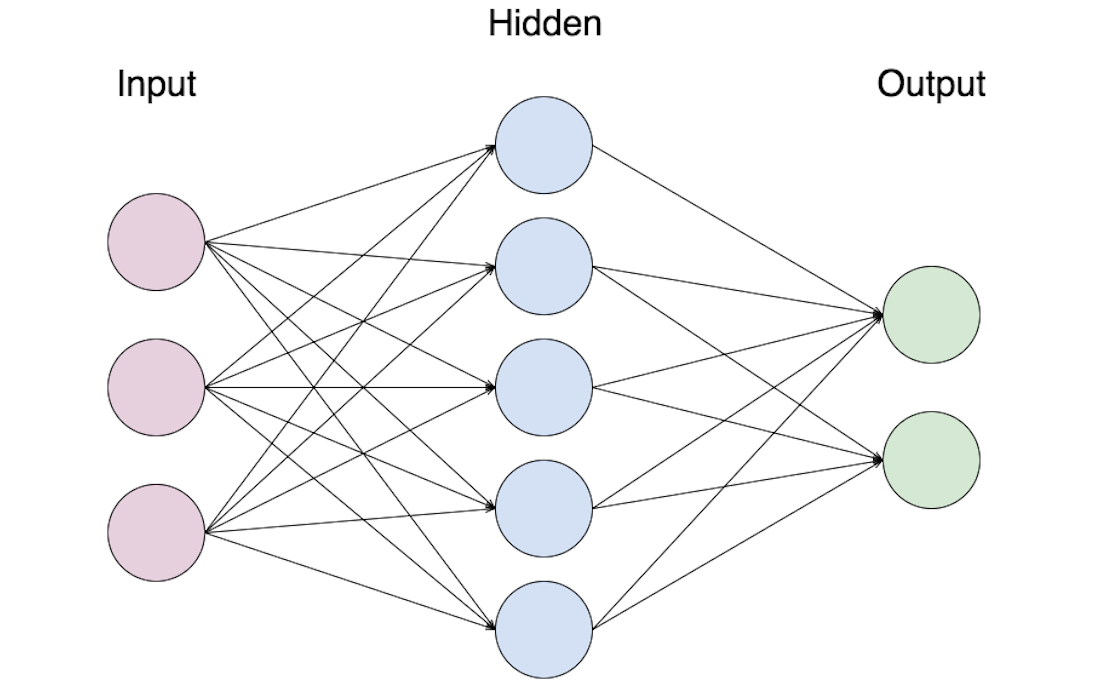

---
Na imagem acima temos um exemplo de uma rede Neural com uma camada de ativação, uma camada oculta (Hidden Layer) e uma camada de saída. Em nosso modelo faremos uma rede com a mesma estrutura, porém, um número diferente neurônios por camada.

---




In [37]:
#craindo a classe rede Neural

class rede_neural():


  def __init__(self, hidden_unit=4, num_iterations = 1000,lr=0.001):              #definindo a parametros inicias e numero de neurônios na camada oculta
    self.hu=hidden_unit
    self.ni=num_iterations
    self.lr=lr

  def define_structure(self):                                                     #funçao para definir a estrutura da rede
    self.input_unit = self.xtrain.shape[0]  #tamanaho da input layer 
                                            #de acordo com o numero de colunas


    self.hidden_unit = self.hu #tamanho da hidden layer


    self.output_unit = self.ytrain.shape[0] # tamanho da outputlayer neste caso 1

    

  def parameters_initialization(self):                                            #funçao iniciar os pesos e bias.
    np.random.seed(2) 
    self.W1 = np.random.randn(self.hidden_unit, self.input_unit)*0.01
    self.b1 = np.zeros((self.hidden_unit, 1))
    self.W2 = np.random.randn(self.output_unit, self.hidden_unit)*0.01
    self.b2 = np.zeros((self.output_unit, 1))


  def sigmoid(self,z):                                                            #função sigmoid
      return 1/(1+np.exp(-z))


  def forward_propagation(self,X):                                                #função para a foward propagtion  
    self.Z1 = np.dot(self.W1, X) + self.b1
    self.A1 = np.tanh(self.Z1)
    self.Z2 = np.dot(self.W2, self.A1) + self.b2
    self.A2 = self.sigmoid(self.Z2)

  def cross_entropy_cost(self):                                                   #função para o calculo da função de custo

    m = self.ytrain.shape[1] #numero de exemplos de treino
 
    logprobs = np.multiply(np.log(self.A2), self.ytrain) + np.multiply((1-self.ytrain), np.log(1 - self.A2))
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost


  def backward_propagation(self):                                                 #função para o backpropagtion(calculo das derivadas em relação aos pesos e bias)

    m = self.xtrain.shape[1] #numero de exemplos de treino
       
    self.dZ2 = self.A2-self.ytrain
    self.dW2 = (1/m) * np.dot(self.dZ2, self.A1.T)
    self.db2 = (1/m) * np.sum(self.dZ2, axis=1, keepdims=True)
    self.dZ1 = np.multiply(np.dot(self.W2.T, self.dZ2), 1 - np.power(self.A1, 2))
    self.dW1 = (1/m) * np.dot(self.dZ1, self.xtrain.T) 
    self.db1 = (1/m)*np.sum(self.dZ1, axis=1, keepdims=True)
    

  def gradient_descent(self):                                                     #função para o gradient descent(atualizando os pesos e bias de acordo com as derivadas)
   
    self.W1 = self.W1 - self.lr * self.dW1
    self.b1 = self.b1 - self.lr * self.db1
    self.W2 = self.W2 - self.lr * self.dW2
    self.b2 = self.b2 - self.lr * self.db2


  def fit(self,X, Y):                                                             #função para o treino da rede
    self.xtrain=X
    self.ytrain=Y
    np.random.seed(3)
    self.define_structure()       #definindo a estrutura
    self.parameters_initialization()  #iniciar os parametros
  
    for i in range(0, self.ni):
        self.forward_propagation(self.xtrain)   #foward propagtion
        cost = self.cross_entropy_cost()  
        self.backward_propagation()             #calculo das derivadas
        self.gradient_descent()                 #atualização dos pesos
        if i % 5 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))    #visualização do custo


  def predict(self, X):                 #função para previsão
    self.forward_propagation(X)
    predictions = np.round(self.A2)
    
    return predictions

In [38]:
#seaprando o Dataset em datasets de treino e teste e transpondo  para a rede neural
    
x= cc_under.iloc[:,:-1].to_numpy()
y= cc_under.iloc[:,-1].to_numpy()


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3, random_state=0)
x_train = x_train.T
y_train = y_train.reshape(1, y_train.shape[0])
x_test = x_test.T
y_test = y_test.reshape(1, y_test.shape[0])
print('Train X Shape: ', x_train.shape)
print('Train Y Shape: ', y_train.shape)
print('I have m = %d training examples!' %(x_train.shape[1]))

print('\nTest X Shape: ', x_test.shape)


Train X Shape:  (29, 662)
Train Y Shape:  (1, 662)
I have m = 662 training examples!

Test X Shape:  (29, 284)


In [39]:
#criação e treino da rede neural com 4 neurônios na hidden layer

rede=rede_neural(hidden_unit=4, num_iterations = 1000,lr=0.01)

rede.fit(x_train,y_train)

Cost after iteration 0: 0.692064
Cost after iteration 5: 0.690772
Cost after iteration 10: 0.689308
Cost after iteration 15: 0.687413
Cost after iteration 20: 0.685171
Cost after iteration 25: 0.682734
Cost after iteration 30: 0.679926
Cost after iteration 35: 0.677081
Cost after iteration 40: 0.673450
Cost after iteration 45: 0.669683
Cost after iteration 50: 0.665767
Cost after iteration 55: 0.660383
Cost after iteration 60: 0.655635
Cost after iteration 65: 0.650876
Cost after iteration 70: 0.645917
Cost after iteration 75: 0.641366
Cost after iteration 80: 0.634873
Cost after iteration 85: 0.629064
Cost after iteration 90: 0.623291
Cost after iteration 95: 0.616490
Cost after iteration 100: 0.611478
Cost after iteration 105: 0.605640
Cost after iteration 110: 0.597849
Cost after iteration 115: 0.594473
Cost after iteration 120: 0.586241
Cost after iteration 125: 0.581000
Cost after iteration 130: 0.574096
Cost after iteration 135: 0.570998
Cost after iteration 140: 0.566153
Cost af

In [40]:
#previsão para testar a acurácia do modelo.


predictions = rede.predict(x_train)
print ('Accuracy Train: %d' % float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100) + '%')
predictions = rede.predict(x_test)
print ('Accuracy Test: %d' % float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100) + '%')

Accuracy Train: 92%
Accuracy Test: 94%




---

Notamos que nosso modelo de rede neural atingiu uma acuracio de 94% para um numero de 1000 iterações, mostrando o correto funcionamento da rede neural.  

---

